In [1]:
# 1. Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

In [2]:
def missing_summary(df):
    miss = df.isnull().sum()
    pct = (miss / len(df) * 100).round(2)
    return pd.DataFrame({'missing_count': miss, 'missing_pct': pct}).sort_values('missing_pct', ascending=False)


In [3]:
def simple_top_words(series, top_n=20):
    text = " ".join(series.dropna().astype(str)).lower()
    tokens = re.findall(r"\b[a-z]{2,}\b", text)
    ctr = Counter(tokens)
    return ctr.most_common(top_n)

In [14]:
DATA_PATH = "../data/metadata.csv"
assert os.path.exists(DATA_PATH), f"Place metadata.csv at {DATA_PATH}"

In [15]:
usecols = ['cord_uid','title','abstract','publish_time','authors','journal','source_x','doi']
existing = [c for c in usecols if c in pd.read_csv(DATA_PATH, nrows=0).columns]
df = pd.read_csv(DATA_PATH, usecols=existing, dtype=str, low_memory=False)

In [16]:
# 5. Parse dates and normalize column names
if 'publish_time' in df.columns:
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', infer_datetime_format=True)
if 'source_x' in df.columns:
    df = df.rename(columns={'source_x': 'source'})

C:\Users\HP\AppData\Local\Temp\ipykernel_16172\3228233715.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', infer_datetime_format=True)


In [17]:
print("Shape:", df.shape)
display(df.head())
df.info()
print("Memory (MB):", df.memory_usage(deep=True).sum() / 1024**2)

Shape: (29500, 7)


,source,title,doi,abstract,publish_time,authors,journal
0,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,2020-01-01,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med
1,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,2020-01-01,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery
2,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,The geographic spread of 2019 novel coronaviru...,2020-01-01,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine
3,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,"In December 2019, cases of unidentified pneumo...",2020-01-01,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med
4,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,2020-01-01,"Zhang, Wei",Intensive Care Med


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   source        29500 non-null  object        
 1   title         29491 non-null  object        
 2   doi           26357 non-null  object        
 3   abstract      26909 non-null  object        
 4   publish_time  1188 non-null   datetime64[ns]
 5   authors       28903 non-null  object        
 6   journal       17791 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.6+ MB
Memory (MB): 72.35734558105469


In [18]:
# 7. Missing values
display(missing_summary(df).head(30))

,missing_count,missing_pct
publish_time,28312,95.97
journal,11709,39.69
doi,3143,10.65
abstract,2591,8.78
authors,597,2.02
title,9,0.03
source,0,0.00


In [19]:
# 8. Missing title/abstract counts
no_title = df['title'].isnull() | (df['title'].str.strip() == "")
no_abstract = df['abstract'].isnull() | (df['abstract'].str.strip() == "")
print("Rows no title:", int(no_title.sum()))
print("Rows no abstract:", int(no_abstract.sum()))
print("Rows no title & no abstract:", int((no_title & no_abstract).sum()))

Rows no title: 9
Rows no abstract: 2591
Rows no title & no abstract: 9


In [20]:
# 9. Uniqueness & duplicates
display(df.nunique(dropna=False).sort_values(ascending=False).head(20))
print("Exact duplicate rows:", int(df.duplicated().sum()))
if 'cord_uid' in df.columns:
    print("Duplicate cord_uid:", int(df.duplicated(subset=['cord_uid']).sum()))


title           25009
authors         24208
abstract        22810
doi             22204
journal          1733
publish_time       11
source              4
dtype: int64

Exact duplicate rows: 4193


In [21]:

# 10. Basic stats
display(df.describe(include='all').T)

,count,unique,top,freq,mean,min,25%,50%,75%,max
source,29500,4,PMC,27337,NaN,NaN,NaN,NaN,NaN,NaN
title,29491,25008,Articles of Significant Interest Selected from...,67,NaN,NaN,NaN,NaN,NaN,NaN
doi,26357,22203,http://dx.doi.org/10.1371/journal.pcbi.1006483,35,NaN,NaN,NaN,NaN,NaN,NaN
abstract,26909,22809,The automated comparison of protein-ligand bin...,35,NaN,NaN,NaN,NaN,NaN,NaN
publish_time,1188,NaN,NaN,NaN,2019-11-08 04:59:23.636364032,2006-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
authors,28903,24207,"['Ehrt, Christiane', 'Brinkjost, Tobias', 'Koc...",35,NaN,NaN,NaN,NaN,NaN,NaN
journal,17791,1732,PLoS One,2204,NaN,NaN,NaN,NaN,NaN,NaN


Earliest: 2006-01-01 00:00:00
Latest: 2020-01-01 00:00:00
Missing publish_time: 28312
Publications by year:


year
2006.0       1
2008.0       1
2012.0       2
2013.0       3
2014.0       7
2015.0       7
2016.0       3
2018.0       7
2019.0       9
2020.0    1148
Name: count, dtype: int64

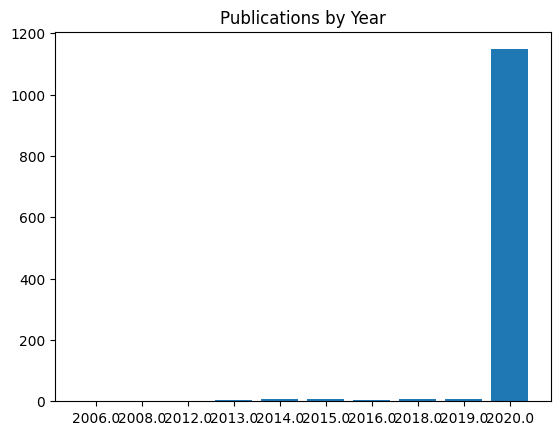

In [22]:
# 11. publish_time checks
if 'publish_time' in df.columns:
    print("Earliest:", df['publish_time'].min())
    print("Latest:", df['publish_time'].max())
    print("Missing publish_time:", int(df['publish_time'].isna().sum()))
    df['year'] = df['publish_time'].dt.year
    print("Publications by year:")
    display(df['year'].value_counts(dropna=True).sort_index())
    # plot
    year_counts = df['year'].value_counts(dropna=True).sort_index()
    plt.figure(); plt.bar(year_counts.index.astype(str), year_counts.values); plt.title("Publications by Year"); plt.show()

journal
                                  11709
PLoS One                           2204
Emerg Infect Dis                    941
Sci Rep                             800
PLoS Pathog                         729
Viruses                             638
Virol J                             398
mBio                                330
BMC Infect Dis                      280
Nucleic Acids Res                   274
PLoS Negl Trop Dis                  227
Front Immunol                       225
Front Microbiol                     217
PLoS Comput Biol                    215
Nat Commun                          184
BMC Vet Res                         173
BMC Public Health                   168
Emerg Microbes Infect               155
BMJ Open                            153
Influenza Other Respir Viruses      151
Name: count, dtype: int64

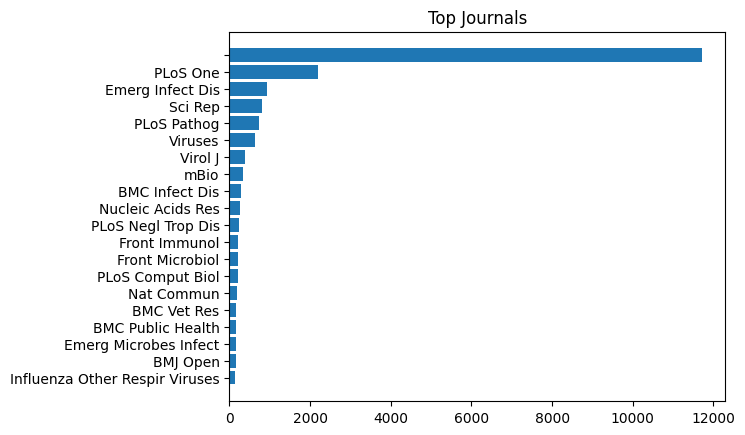

In [23]:
# 12. Top journals plot
if 'journal' in df.columns:
    df['journal'] = df['journal'].fillna('').astype(str).str.strip()
    top_j = df['journal'].value_counts().head(20)
    display(top_j)
    plt.figure(); plt.barh(top_j.index, top_j.values); plt.title("Top Journals"); plt.gca().invert_yaxis(); plt.show()

count    29500.000000
mean        13.519797
std          5.191232
min          0.000000
25%         10.000000
50%         13.000000
75%         17.000000
max        130.000000
Name: title, dtype: float64

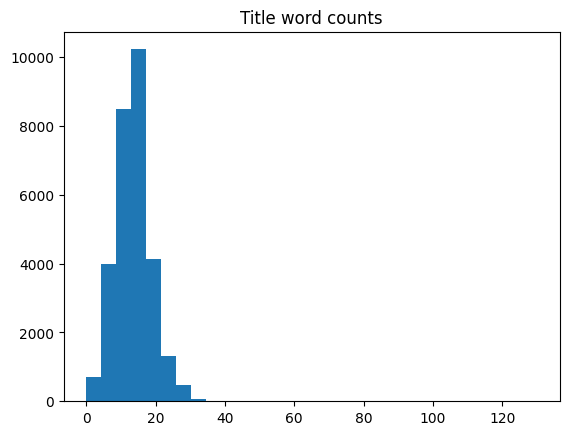

In [24]:
# 13. Title & abstract length distributions
if 'title' in df.columns:
    title_len = df['title'].fillna('').astype(str).str.split().str.len()
    display(title_len.describe())
    plt.figure(); plt.hist(title_len, bins=30); plt.title("Title word counts"); plt.show()

count    29500.000000
mean       192.679525
std        161.755952
min          0.000000
25%        142.000000
50%        199.000000
75%        251.000000
max      18000.000000
Name: abstract, dtype: float64

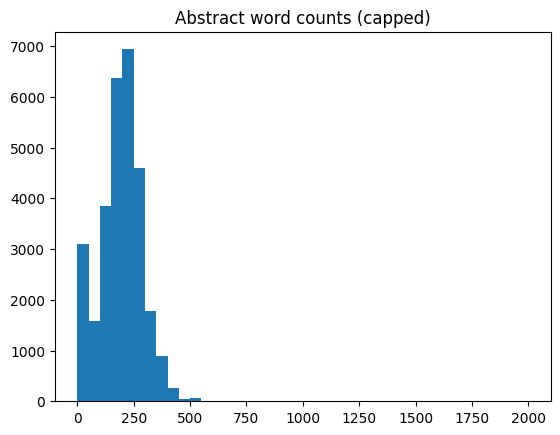

In [25]:
if 'abstract' in df.columns:
    abstract_len = df['abstract'].fillna('').astype(str).str.split().str.len()
    display(abstract_len.describe())
    plt.figure(); plt.hist([v if v < 2000 else 2000 for v in abstract_len], bins=40); plt.title("Abstract word counts (capped)"); plt.show()

In [26]:
# 14. Naive top words from titles
if 'title' in df.columns:
    display(pd.DataFrame(simple_top_words(df['title'], top_n=30), columns=['word','count']))

,word,count
0,of,23687
1,and,14690
2,in,14443
3,the,12606
4,virus,6108
5,for,5321
6,to,4221
7,with,3694
8,respiratory,3547
9,coronavirus,3477
